In [1]:
# coding=utf-8
from lytools import *  ## pip install lytools==0.0.47
from scipy.stats import f_oneway
data_path = '../../data/SI_Fig03'
land_path = '../../data/common_data/land_mask.tif'

lytools version 0.0.47


In [2]:
def plot_spatial(ax,fpath,vmin=None,vmax=None):
    ## plot spatial figure
    array = ToRaster().raster2array(fpath)[0]
    # mask nan values
    array[array < -9999] = np.nan
    # above 30 degree
    array = array[:120]
    # plot the spatial figure
    pcm = ax.imshow(array, cmap='Spectral_r', vmin=vmin, vmax=vmax, aspect='auto', interpolation='nearest')
    # plot the land mask
    arr = ToRaster().raster2array(land_path)[0]
    back_ground = []
    for i in range(len(arr)):
        temp = []
        for j in range(len(arr[0])):
            val = arr[i][j]
            if val < -90000:
                temp.append(np.nan)
            else:
                temp.append(1)
        back_ground.append(temp)
    back_ground = np.array(back_ground)
    ax.imshow(back_ground[:int(len(arr) / 2)], 'gray', vmin=0, vmax=1.4, zorder=-1, aspect='auto', interpolation='nearest')
    return pcm


In [3]:
def plot_SI_Fig03():
    ## plot figure S3
    vegetation_product_list = ['NDVI','CSIF','VOD']
    fig,axs = plt.subplots(1,3,figsize=(12,3))
    col = 0
    for vegetation_product in vegetation_product_list:
        for tif in Tools().listdir(data_path):
            if not vegetation_product in tif:
                continue
            fpath = join(data_path, tif)
            ax = axs[col]
            pcm = plot_spatial(ax,fpath,vmin=0,vmax=7)
            ax.set_title(f'{tif[:-4]}')
            ax.set_xticks([])
            ax.set_yticks([])
            col += 1

    fig.colorbar(pcm,ax=[axs[:]], location='bottom', shrink=.3,label='Drought recovery (months)')
    plt.show()
    pass


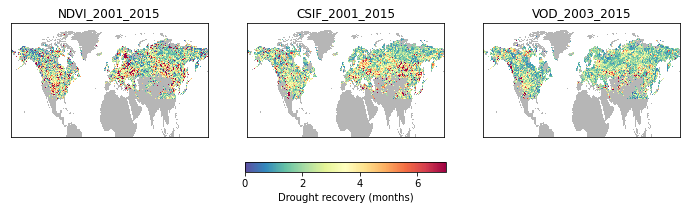

In [4]:
plot_SI_Fig03()